<a href="https://colab.research.google.com/github/karaimer/ColorScience/blob/master/ColorSciencePartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, base64

import numpy as np

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# This tutorial is built on top of the Image Formation Tutorial. 

# We will go over the tutorial now and notice the difference starting at at the HVS section.  

In [3]:
! rm -rf '/content/drive/My Drive/Image_Formation'
!git clone https://github.com/karaimer/Image-Formation.git '/content/drive/My Drive/Image_Formation'

Cloning into '/content/drive/My Drive/Image_Formation'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 38 (delta 1), reused 4 (delta 1), pack-reused 31
Unpacking objects: 100% (38/38), done.


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Image_Formation')  
from ivrl_helper import plot_spectrum

In [0]:
resourse_path = '/content/drive/My Drive/Image_Formation/np_resources/'

## Illuminants

Perfectly white light has equal power in all wavelengths of light. In reality, light sources have non-uniform spectral power distirbutions, i.e., they vary in the amount of power they emit at different wavelengths $\lambda$.
 
These files listen below contain the spectral power distribution $E(\lambda)$ of various light sources.

In [6]:
!ls /content/drive/My\ Drive/Image_Formation/np_resources/illuminants/

A.npy  D50.npy	D65.npy  F2.npy


In [7]:
illuminant = np.load(resourse_path + 'illuminants/D65.npy')
print(illuminant.shape)

(531, 2)


`illuminant` contains two columns. The first column specifies a wavelength and the second column specifies the relative power measured at that wavelength.

_Note:_ the provided illuminent data files may differ in the grid of wavelengths measured.

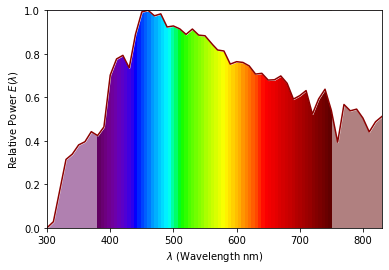

In [8]:
plot_spectrum(illuminant[:,0], illuminant[:,1], ylabel='Relative Power $E(\lambda)$')

In the plot above we show the correspondence between wavelength and the _perceived_ color of light. Note that light sources often emit light at wavelengths outside the visible spectrum, i.e., $\lambda<380$ or $\lambda>740$.

# Reflectance

When light hits an object, some wavelengths get absorbed by the object and some get reflected away. The object thus serves as a filter on the lightsource, a behavior characterized by its _reflectance_ property.

By shining a white light at an object, its reflectance can be measured at various wavelengths. The files listed below contain _hyperscpetral_ images, i.e., measurements of reflectance at various wavelengths.


In [9]:
!ls /content/drive/My\ Drive/Image_Formation/np_resources/spectral_images/

CDREF31_persilcolour.npy  CDREF31_unclebens.npy


In [10]:
image_file = 'CDREF31_persilcolour.npy'

wavelengths = np.arange(400,710,10)
image = np.load(os.path.join(resourse_path, 'spectral_images', image_file))
print(image.shape)

(31, 256, 336)


`image` is a 3-dimensional array, where the dimension 0 corresponds to the 31 `wavelengths` at which reflectance was measured. Dimensions 1 and 2 are spatial dimensions of the captured image.

To get an idea of the object being photographed, we visualize below the average intensity, averaged over all wavelengths.



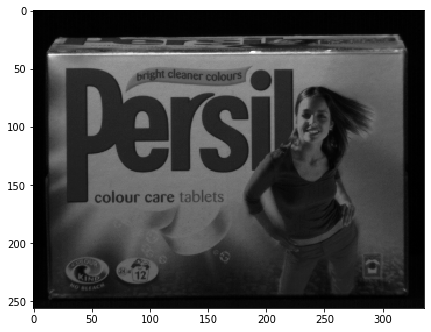

In [11]:
plt.figure(figsize=(7,6))
plt.imshow(image.mean(0), cmap='Greys_r')

By choosing a spacific pixel location $x$, we can visualize the relative reflectance $S(x, \lambda)$ along the spectrum at that position (e.g., 50,130):


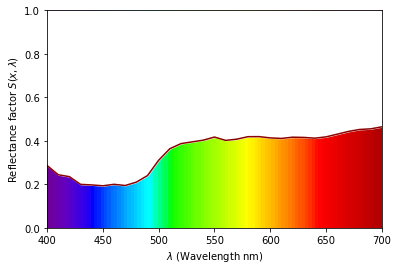

In [12]:
plt.figure()
plot_spectrum(wavelengths, image[:,50,130], ylabel='Reflectance factor $S(x, \lambda)$')

Below we show the reflectance measured at various spatial positions.<br>

Can you tell which percieved colors these reflectances correspond to? Set  `show_color_labels = True`  to reveal the answers


In [0]:
show_color_labels = False

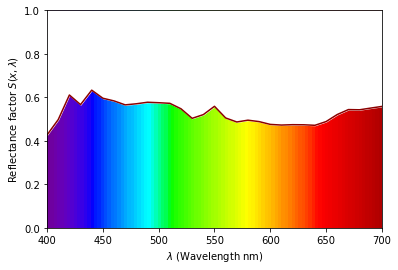

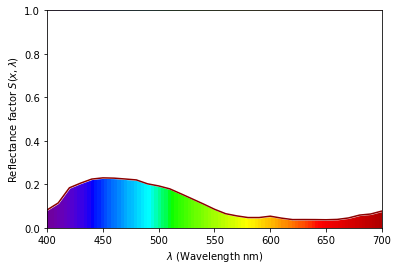

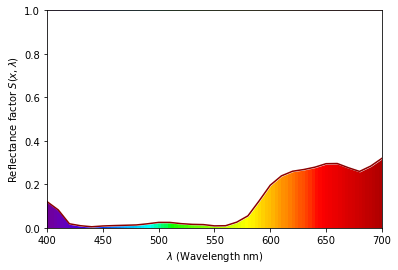

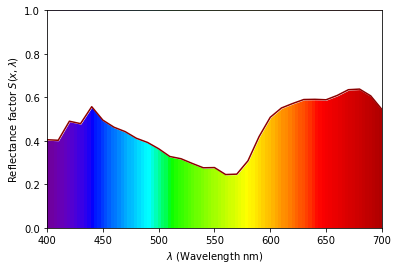

In [14]:
if image_file == 'CDREF31_persilcolour.npy':
    plt.figure()
    plot_spectrum(wavelengths, image[:,40,15], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'V2hpdGUoLWlzaCk=').decode())

    plt.figure()
    plot_spectrum(wavelengths, image[:,227,296], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'Qmx1ZQ==').decode())

    plt.figure()
    plot_spectrum(wavelengths, image[:,100,125], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'UmVk').decode())

    plt.figure()
    plot_spectrum(wavelengths, image[:,36,100], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'UGluaw==').decode())

# Sensors

The perception of light is enabled by photo-sensitive sensors, which respond to light by emitting an electric charge. The strength of this response varies by wavelength, and is characetrized by the _sensitivity_ of the sensor, $R(\lambda)$. 

### HVS

Before researchers understand the biology of the _cone_ cells of the human eye system, they conducted color matching experiments for this purpose and therefore the CIE XYZ color space was introduced as an average observer sensitivity. 


In [15]:
cie_xyz = np.genfromtxt(resourse_path + 'ciexyz31_1.csv', delimiter=',')
print(cie_xyz.shape)

(471, 4)


`cie_xyz` has 3 columns, based on the color matching experiments conducted in 1931.

In [16]:
CIE_X = cie_xyz[np.isin(cie_xyz[:,0], wavelengths),1]
CIE_Y = cie_xyz[np.isin(cie_xyz[:,0], wavelengths),2]
CIE_Z = cie_xyz[np.isin(cie_xyz[:,0], wavelengths),3]


cie_xyz = np.stack((CIE_X,CIE_Y,CIE_Z))
cie_xyz = cie_xyz.T
print(cie_xyz.shape)

(31, 3)


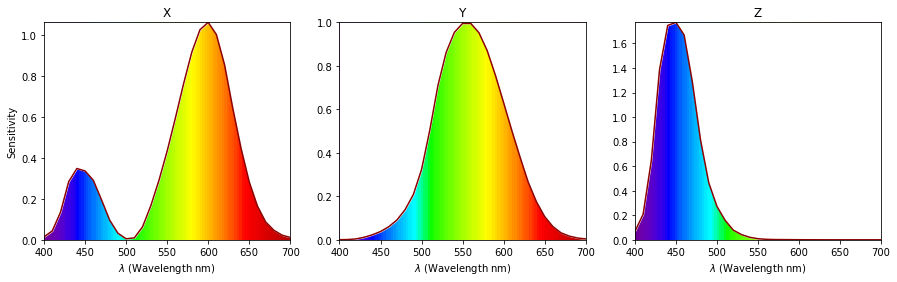

In [17]:
plt.figure(figsize=(15,4))
for i, channel in enumerate(('X', 'Y', 'Z')):
    plt.subplot(1,3,i+1)
    plot_spectrum(wavelengths, cie_xyz[:,i], ylabel='Sensitivity' if i==0 else None)
    plt.title(channel)

### Camera

The sillicon-based camera sensor is placed behind a filter which allows only certain wavelengths to go through. These filters (of which, uncodincidentally there are 3) correspond largely to <b>R</b>ed, <b>G</b>reen, <b>B</b>lue.


In [18]:
camera_sensitivity = np.load(resourse_path + 'camera_sensitivity.npy')
print(camera_sensitivity.shape)

(31, 3)


`camera_sensitivity` has 3 columns, each corresponding to the sentivity of the sensor when placed behind a different filter, measured at various wavelengths. These sensitivity curves are shown below:

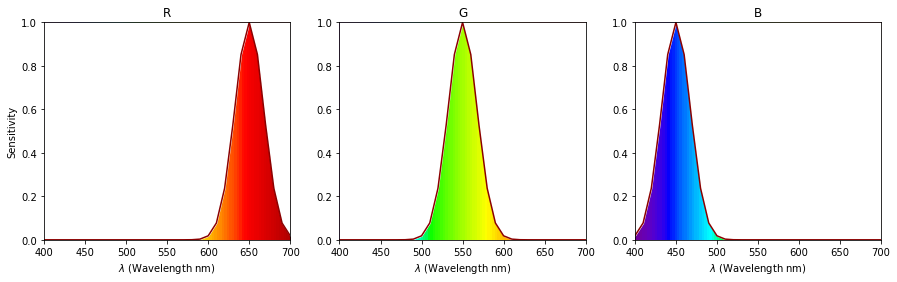

In [19]:
plt.figure(figsize=(15,4))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plot_spectrum(wavelengths, camera_sensitivity[:,i], ylabel='Sensitivity' if i==0 else None)
    plt.title(channel)

# Image formation

The final color response $\rho_\kappa$ of the average observers  with color matching functions $R(\lambda)$ in response to light reflecting off a point $x$ with reflectance $S(x, \lambda)$, under a light source with spectral power distribution $E(\lambda)$ is:

$\rho_\kappa= \int_\lambda R(\lambda)S(x, \lambda)E(\lambda)~d\lambda$

Note that this model of the color response considers an intergral over a continuous spectrum. In practice, however, the response is computed discretely, by summing over $\lambda$ over a sampling grid $\Lambda$, e.g.:

$\rho_\kappa= \sum_{\lambda\in\Lambda} \lambda R(\lambda)S(x, \lambda)E(\lambda)~~~$ for $\Lambda = \{400 + i\cdot10 | 0\leq i\leq 30, i\in\mathcal{N}\}$

Fill in the code below to compute the an CIE XYZ image for the loaded scpetral image and illuminant.

In [0]:
X = np.sum(cie_xyz[:,0].reshape(-1,1,1) * 
           illuminant[np.isin(illuminant[:,0], wavelengths),1].reshape(-1,1,1) * 
           image, 0)
Y = np.sum(cie_xyz[:,1].reshape(-1,1,1) * 
           illuminant[np.isin(illuminant[:,0], wavelengths),1].reshape(-1,1,1) * 
           image, 0)
Z = np.sum(cie_xyz[:,2].reshape(-1,1,1) * 
           illuminant[np.isin(illuminant[:,0], wavelengths),1].reshape(-1,1,1) * 
           image, 0)
result = np.stack((X,Y,Z)).transpose(1,2,0)

result /= result.max() #normalize

In [21]:
result.shape

(256, 336, 3)

`result` is now a valid XYZ image



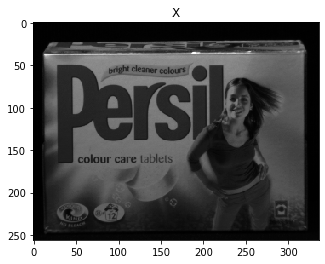

In [22]:
plt.title('X')
plt.imshow(result[:,:,0], cmap='Greys_r')

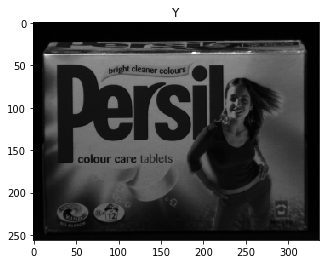

In [23]:
plt.title('Y')
plt.imshow(result[:,:,1], cmap='Greys_r')

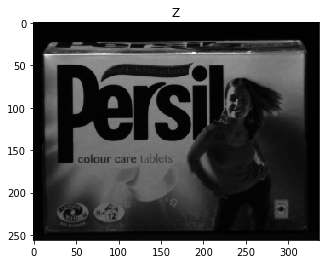

In [24]:
plt.title('Z')
plt.imshow(result[:,:,2], cmap='Greys_r')


#In the following we will study color difference formulas to calculate perceptual differences. 

In [0]:
XYZ1 = result[100,300,:]
XYZ2 = result[150,300,:]

In [26]:
!pip install colour-science

In [0]:
from colour import XYZ_to_Lab

In [28]:
lab1 = XYZ_to_Lab(XYZ1)
print(lab1)

lab2 = XYZ_to_Lab(XYZ2)
print(lab2)

[ 56.59478443   8.98559213   1.27250154]
[ 47.6752991   15.4687585   40.77904225]


In [29]:
XYZs = np.stack((XYZ1, XYZ2), axis = 0) 
XYZs

array([[ 0.25360698,  0.24509942,  0.25886859],
       [ 0.18531351,  0.16540134,  0.04473224]])

In [30]:
labs = XYZ_to_Lab(XYZs)
print(labs)

[[ 56.59478443   8.98559213   1.27250154]
 [ 47.6752991   15.4687585   40.77904225]]


In [0]:
result_shape = result.shape
XYZ_pixels = result.reshape(-1, 3)     # Nx3 array of pixels
LAB_pixels = XYZ_to_Lab(XYZ_pixels)

In [0]:
from skimage.color import xyz2rgb, rgb2lab
RGBresult  = xyz2rgb(result)
LABresult = rgb2lab(RGBresult)
#LABresult  = LAB_pixels.reshape(result_shape)

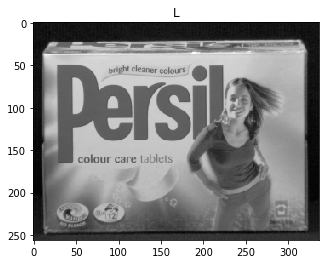

In [33]:
plt.title('L')
plt.imshow(LABresult[:,:,0], cmap='Greys_r')

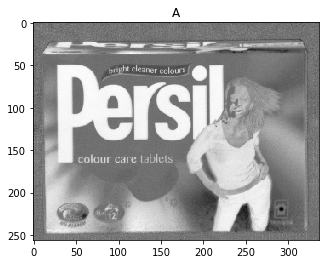

In [34]:
plt.title('A')
plt.imshow(LABresult[:,:,1], cmap='Greys_r')

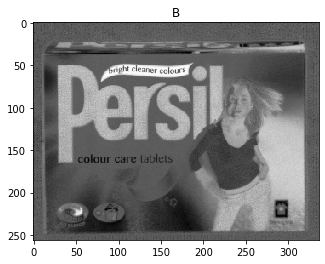

In [35]:
plt.title('B')
plt.imshow(LABresult[:,:,2], cmap='Greys_r')

In [36]:
import math  
deltaE = math.sqrt((lab1[0] - lab2[0])**2 + (lab1[1] - lab2[1])**2 + (lab1[2] - lab2[2])**2)
deltaE

41.016526222220264

This is the first proposed delta E formula. 

See the details and the historical progress in the following: 

https://en.wikipedia.org/wiki/Color_difference#CIE76

In the following we will refer to a package called 'colour-science' to further discuss delta E computations. 

In [0]:
from colour.difference import delta_E_CIE1976, delta_E_CIE1994, delta_E_CIE2000

In [0]:
Lab_1 = np.array([lab1[0], lab1[1], lab1[2]])
Lab_2 = np.array([lab2[0], lab2[1], lab2[2]])

In [39]:
delta_E_CIE1976(Lab_1, Lab_2)

41.016526222220264

The Delta E 1994 and the Delta E 2000 is slightly more complicated than the first version that was proposed in 1976. 

Please refer to here for more details: 

https://en.wikipedia.org/wiki/Color_difference#CIE94

https://en.wikipedia.org/wiki/Color_difference#CIEDE2000

In [40]:
delta_E_CIE1994(Lab_1, Lab_2) 

31.598987301218003

In [41]:
delta_E_CIE2000(Lab_1, Lab_2) 

24.027927129257208